In [73]:
import pandas as pd
import os
import pickle

from keras.optimizers import SGD

import matplotlib.pyplot as plt

In [78]:
optimize = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
# optimize = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

In [ ]:
os.makedirs('ml/output/models', exist_ok=True)
os.makedirs('ml/output/history', exist_ok=True)

In [ ]:
df = pickle.load(open('dataset/data/train_1.p', 'rb'))
X_train = df['X_train']
Y_train = df['Y_train']

In [ ]:
df = pickle.load(open('dataset/data/val_1.p', 'rb'))
X_val = df['X_val']
Y_val = df['Y_val']

In [ ]:
print(len(X_train[0]))
print(len(X_val[0]))
print(X_train.shape[1])

500
500
500


In [74]:
from ml.nn import DeNN

length = 500

d_model = {
    "DeNN" : DeNN.build(length),
}

In [75]:
name = 'DeNN'
model = d_model[name]
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                32064     
                                                                 
 activation_21 (Activation)  (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 activation_22 (Activation)  (None, 64)                0         
                                                                 
 dropout_14 (Dropout)        (None, 64)                0         
                                                                 
 flatten_7 (Flatten)         (None, 64)                0         
                                                                 
 dense_23 (Dense)            (None, 32)               

In [76]:
num = 1

In [79]:
model.compile(loss='huber', optimizer=optimize, metrics=['mean_absolute_error'])

history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=5, batch_size=32,
                    verbose=1)

model.save(os.path.join('ml/output/models/',f'{name}_{num}.hdf5'))

pickle.dump(history,
            open(os.path.join('ml/output/history/',f'{name}_{num}.p'),'wb'))

Epoch 1/5
3125/3125 [==============================] - 15s 5ms/step - loss: 29.2270 - mean_absolute_error: 29.7217 - val_loss: 13.6789 - val_mean_absolute_error: 14.1710
Epoch 2/5
3125/3125 [==============================] - 23s 7ms/step - loss: 18.8263 - mean_absolute_error: 19.3200 - val_loss: 13.6345 - val_mean_absolute_error: 14.1267
Epoch 3/5
3125/3125 [==============================] - 15s 5ms/step - loss: 18.7018 - mean_absolute_error: 19.1955 - val_loss: 13.7988 - val_mean_absolute_error: 14.2911
Epoch 4/5
3125/3125 [==============================] - 14s 4ms/step - loss: 18.5062 - mean_absolute_error: 18.9997 - val_loss: 13.6943 - val_mean_absolute_error: 14.1866
Epoch 5/5
3125/3125 [==============================] - 12s 4ms/step - loss: 18.3092 - mean_absolute_error: 18.8026 - val_loss: 13.5916 - val_mean_absolute_error: 14.0837


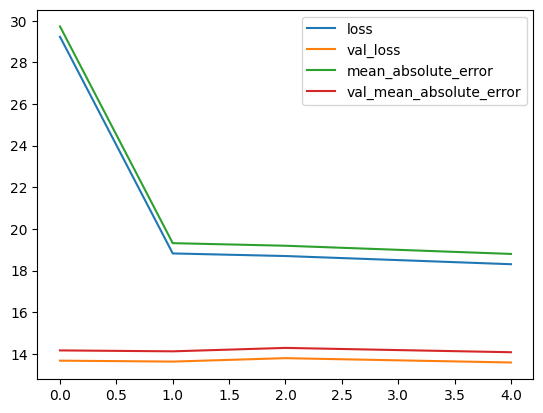

In [80]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['mean_absolute_error'], label='mean_absolute_error')
plt.plot(history.history['val_mean_absolute_error'], label='val_mean_absolute_error')
# plt.plot(history.history['mean_squared_error'], label='mean_squared_error')
# plt.plot(history.history['val_mean_squared_error'], label='val_mean_squared_error')
plt.legend()
plt.show()

In [82]:
df = pickle.load(open('dataset/data/test_1.p', 'rb'))
X_test = df['X_test']
Y_test = df['Y_test']

In [83]:
i = 200
X_tst = X_test[i:i+1]
Y_tst = Y_test[i:i+1]

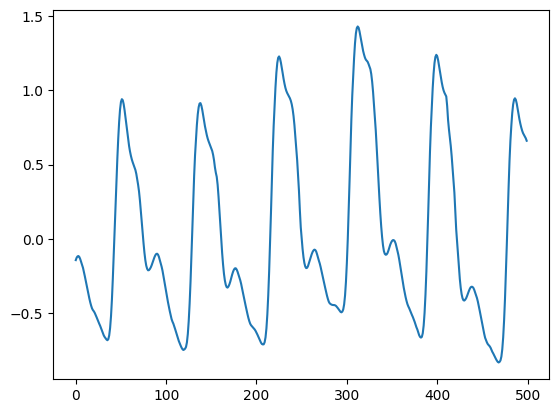

In [84]:
plt.plot(X_tst[0], label='input')
plt.show()

In [85]:
# print(Y_test)
pre = model.predict(X_tst)

# plt.plot(pre[0][0], label='pre')
# plt.plot(Y_tst[0], label='true')
# plt.legend()
# plt.show()

1/1 [==============================] - 0s 85ms/step


In [86]:
print(pre)
print(Y_tst[0])

[[131.06572   66.134125]]
[[139.9089156 ]
 [ 78.77569442]]
